## **<font style="color:rgb(134,19,348)">Deepface</font>**


<!-- https://pypi.org/project/deepface/0.0.89/ -->
<!-- https://sefiks.com/2020/05/01/a-gentle-introduction-to-face-recognition-in-deep-learning/ -->


Deepface is a lightweight face recognition and facial attribute analysis (age, gender, emotion and race) framework for python. It is a hybrid face recognition framework wrapping state-of-the-art models: *`VGG-Face, Google FaceNet, OpenFace, Facebook DeepFace, DeepID, ArcFace, Dlib, SFace and GhostFaceNet`*.

Experiments show that human beings have 97.53% accuracy on facial recognition tasks whereas those models already reached and passed that accuracy level.

If you run face recognition with DeepFace, you get access to a set of features: 

- `Face Verification:` The task of face verification refers to comparing a face with another to verify if it is a match or not. Hence, face verification is commonly used to compare a candidate’s face to another. This can be used to confirm that a physical face matches the one in an ID document. 

- `Face Recognition:` The task refers to finding a face in an image database. Performing face recognition requires running face verification many times. 

- `Facial Attribute Analysis:` The task of facial attribute analysis refers to describing the visual properties of face images. Accordingly, facial attributes analysis is used to extract attributes such as age, gender classification, emotion analysis, or race/ethnicity prediction. 

- `Real-Time Face Analysis:` This feature includes testing face recognition and facial attribute analysis with the real-time video feed of your webcam. 

Next, I will explain how to perform those deep face recognition tasks with DeepFace.  


<!-- **`Facial Recognition:`** -->
A modern face recognition pipeline consists of 5 common stages: *`detect, align, normalize, represent and verify`*. While Deepface handles all these common stages in the background, you don’t need to acquire in-depth knowledge about all the processes behind it. You can just call its verification, find or analysis function with a single line of code.


In [1]:
# env_9_3 venv
import numpy as np
import matplotlib.pyplot as  plt
import cv2
from deepface import DeepFace
import os
from PIL import Image 

**`Face Verification`**

This function verifies face pairs as same person or different persons. It expects exact image paths as inputs. Passing numpy or base64 encoded images is also welcome. Then, it is going to return a dictionary and you should check just its verified key.

In [2]:
%pwd

'c:\\Users\\faiza\\Music\\Project\\eKYC\\notebooks'

In [3]:
os.chdir("../")
%pwd

'c:\\Users\\faiza\\Music\\Project\\eKYC'

In [4]:

base_dir = os.path.join('data', '01_raw_data')
filename1 = "srk1.jpeg"
filename2 = "srk2.webp"
img_path1 = os.path.join(base_dir, filename1)
img_path2 = os.path.join(base_dir, filename2)

print(f"Image Path 1: {img_path1} - Exists: {os.path.exists(img_path1)}")
print(f"Image Path 2: {img_path2} - Exists: {os.path.exists(img_path2)}")


Image Path 1: data\01_raw_data\srk1.jpeg - Exists: True
Image Path 2: data\01_raw_data\srk2.webp - Exists: True


In [5]:
import cv2

img1=cv2.imread(img_path1)
img1

array([[[  7,  13,  24],
        [  7,  13,  24],
        [  7,  13,  24],
        ...,
        [ 50,  66, 132],
        [ 50,  66, 132],
        [ 51,  67, 133]],

       [[  6,  12,  23],
        [  7,  13,  24],
        [  7,  13,  24],
        ...,
        [ 56,  72, 138],
        [ 57,  73, 139],
        [ 57,  73, 139]],

       [[  6,  12,  23],
        [  6,  12,  23],
        [  6,  12,  23],
        ...,
        [ 52,  68, 134],
        [ 53,  69, 135],
        [ 53,  69, 135]],

       ...,

       [[  3,   6,  14],
        [  3,   6,  14],
        [  3,   6,  14],
        ...,
        [ 19,  23,  48],
        [ 19,  22,  50],
        [ 19,  23,  48]],

       [[  1,   7,  14],
        [  1,   7,  14],
        [  1,   7,  14],
        ...,
        [ 19,  25,  44],
        [ 19,  24,  45],
        [ 19,  25,  44]],

       [[  1,   7,  14],
        [  1,   7,  14],
        [  1,   7,  14],
        ...,
        [ 19,  26,  43],
        [ 19,  26,  43],
        [ 19,  26,  43]]

In [6]:
img2 = cv2.imread(img_path2)
img2

array([[[ 61, 105, 164],
        [ 61, 105, 164],
        [ 62, 106, 165],
        ...,
        [143, 188, 224],
        [144, 189, 225],
        [144, 189, 225]],

       [[ 61, 105, 164],
        [ 61, 105, 164],
        [ 62, 106, 165],
        ...,
        [143, 188, 224],
        [144, 189, 225],
        [144, 189, 225]],

       [[ 61, 105, 164],
        [ 61, 105, 164],
        [ 62, 106, 165],
        ...,
        [143, 188, 224],
        [144, 189, 225],
        [144, 189, 225]],

       ...,

       [[ 45,  42,  45],
        [ 45,  42,  45],
        [ 46,  43,  46],
        ...,
        [187, 211, 235],
        [187, 211, 235],
        [187, 211, 235]],

       [[ 45,  42,  45],
        [ 45,  42,  45],
        [ 46,  43,  46],
        ...,
        [187, 211, 235],
        [187, 211, 235],
        [187, 211, 235]],

       [[ 45,  42,  45],
        [ 45,  42,  45],
        [ 46,  43,  46],
        ...,
        [187, 211, 235],
        [187, 211, 235],
        [187, 211, 235]]

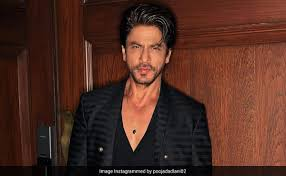

In [7]:
im1=Image.open(img_path1)
im1


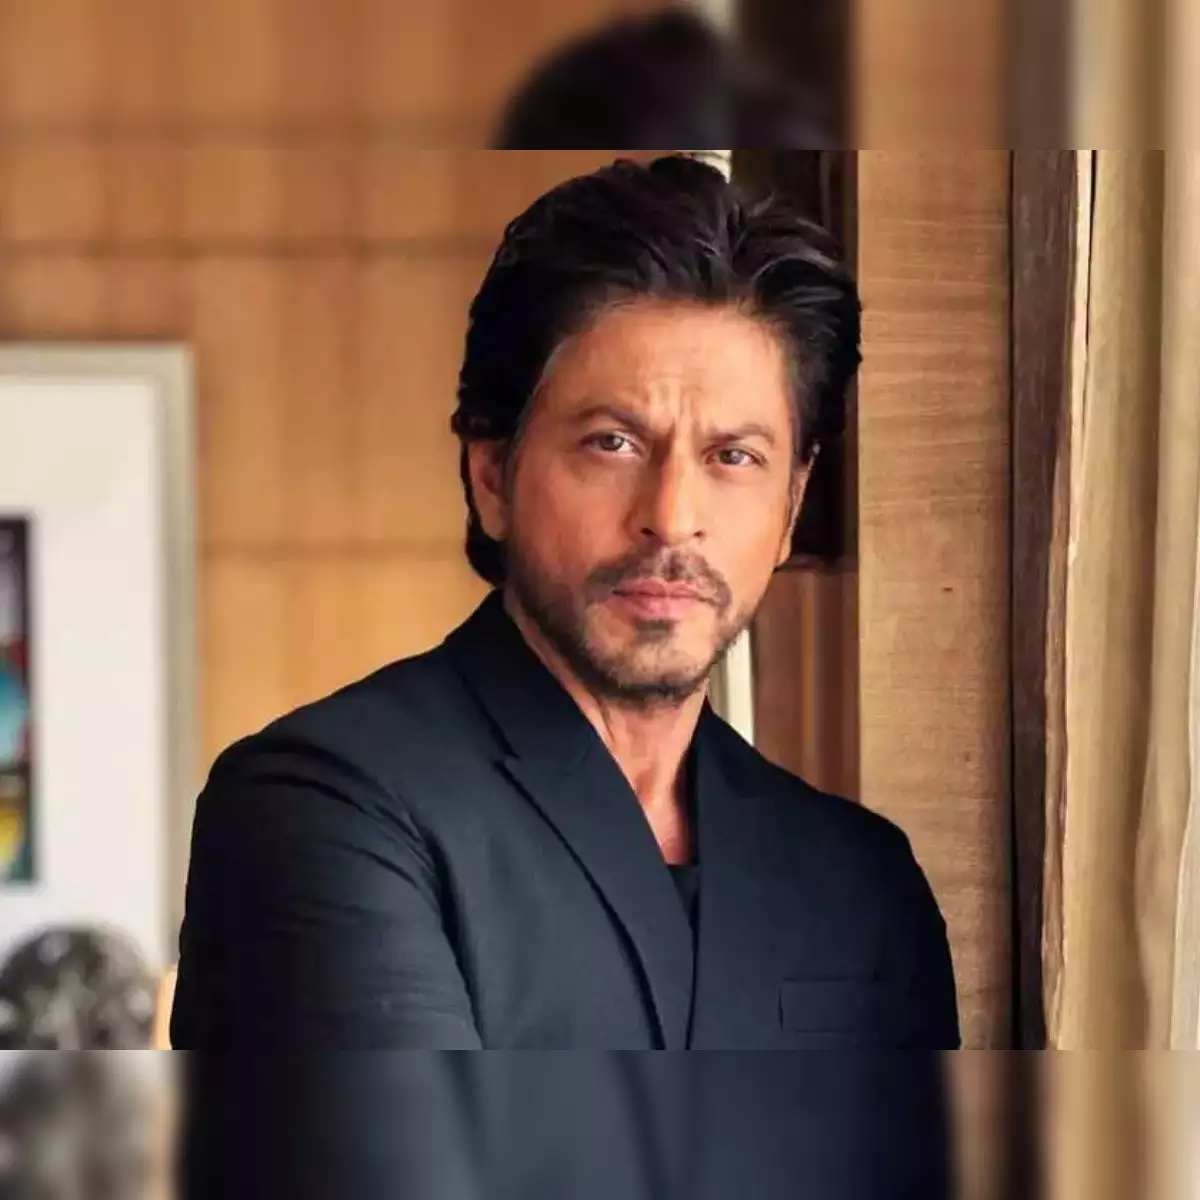

In [8]:
im2=Image.open(img_path2)
im2


In [9]:



verfication = DeepFace.verify(img1_path=img_path1, img2_path=img_path2)
verfication

{'verified': True,
 'distance': 0.5760723657456304,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 117,
   'y': 26,
   'w': 56,
   'h': 56,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 505,
   'y': 325,
   'w': 333,
   'h': 333,
   'left_eye': (726, 457),
   'right_eye': (609, 443)}},
 'time': 4.17}

In [10]:
face1_boundary = verfication['facial_areas']['img1']
face2_boundary = verfication['facial_areas']['img2']

face1_boundary, face2_boundary

({'x': 117, 'y': 26, 'w': 56, 'h': 56, 'left_eye': None, 'right_eye': None},
 {'x': 505,
  'y': 325,
  'w': 333,
  'h': 333,
  'left_eye': (726, 457),
  'right_eye': (609, 443)})

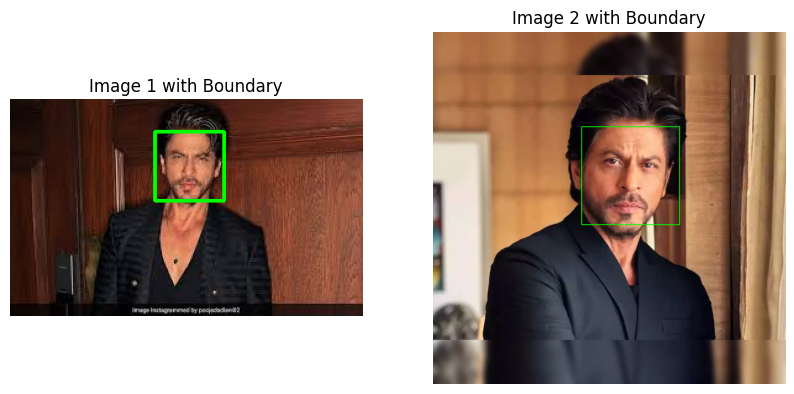

In [11]:
# Load the images
img1 = cv2.imread(img_path1)
img2 = cv2.imread(img_path2)

# Draw boundary on the first image
x1, y1, w1, h1 = face1_boundary['x'], face1_boundary['y'], face1_boundary['w'], face1_boundary['h']
cv2.rectangle(img1, (x1, y1), (x1 + w1, y1 + h1), (0, 255, 0), 2)

# Draw boundary on the second image
x2, y2, w2, h2 = face2_boundary['x'], face2_boundary['y'], face2_boundary['w'], face2_boundary['h']
cv2.rectangle(img2, (x2, y2), (x2 + w2, y2 + h2), (0, 255, 0), 2)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Image 1 with Boundary')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Image 2 with Boundary')
plt.axis('off')
plt.show()

Note : This show that it able to capture face with boundaries

Face recognition requires applying face verification many times. Herein, deepface has an out-of-the-box find function to handle this action. It's going to look for the identity of input image in the database path and it will return list of pandas data frame as output. Meanwhile, facial embeddings of the facial database are stored in a pickle file to be searched faster in next time. Result is going to be the size of faces appearing in the source image. Besides, target images in the database can have many faces as well.

In [12]:
dfs = DeepFace.find(img_path = img_path2, db_path = "data\\faces")

24-05-30 03:25:26 - Found 1 newly added image(s), 1 removed image(s), 0 replaced image(s).


Finding representations: 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]


24-05-30 03:25:26 - There are now 4 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
24-05-30 03:25:26 - Searching data\01_raw_data\srk2.webp in 4 length datastore
24-05-30 03:25:27 - find function duration 0.5132496356964111 seconds


In [13]:
dfs

[               identity                                      hash  target_x  \
 0  data\faces\Shah2.jpg  5dbd20f9ade6a72628cb5cc8ebb206c004f21538       112   
 
    target_y  target_w  target_h  source_x  source_y  source_w  source_h  \
 0        36        65        65       505       325       333       333   
 
    threshold  distance  
 0       0.68  0.552613  ]

**`Embeddings`**

Face recognition models basically represent facial images as multi-dimensional vectors. Sometimes, you need those embedding vectors directly. DeepFace comes with a dedicated representation function. Represent function returns a list of embeddings. Result is going to be the size of faces appearing in the image path.

In [14]:
embedding_objs = DeepFace.represent(img_path = img_path1)
embedding = embedding_objs[0]["embedding"]
len(embedding)

4096

**`Face recognition models`**

Deepface is a hybrid face recognition package. It currently wraps many state-of-the-art face recognition models: VGG-Face , FaceNet, OpenFace, DeepFace, DeepID, ArcFace, Dlib, SFace and GhostFaceNet. The default configuration uses VGG-Face model.

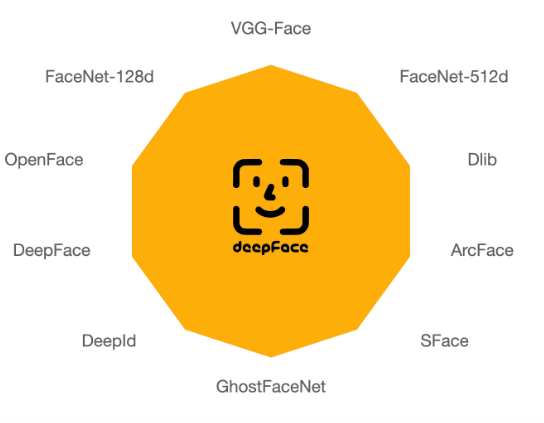

In [15]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
  "GhostFaceNet",
]

#face verification
result = DeepFace.verify(img1_path = img_path1, 
      img2_path = img_path2, 
      model_name = models[0]
)

#face recognition
dfs = DeepFace.find(img_path = img_path1,
      db_path = "data\\faces", 
      model_name = models[1]
)

#embeddings
embedding_objs = DeepFace.represent(img_path = img_path1, 
      model_name = models[2]
)

24-05-30 03:25:36 - Found 1 newly added image(s), 1 removed image(s), 0 replaced image(s).


Finding representations: 100%|██████████| 1/1 [00:02<00:00,  2.33s/it]


24-05-30 03:25:38 - There are now 4 representations in ds_model_facenet_detector_opencv_aligned_normalization_base_expand_0.pkl
24-05-30 03:25:38 - Searching data\01_raw_data\srk1.jpeg in 4 length datastore
24-05-30 03:25:38 - find function duration 2.5170278549194336 seconds


**`Similarity`**

Face recognition models are regular convolutional neural networks and they are responsible to represent faces as vectors. We expect that a face pair of same person should be more similar than a face pair of different persons.

Similarity could be calculated by different metrics such as Cosine Similarity, Euclidean Distance and L2 form. The default configuration uses cosine similarity.

In [16]:
metrics = ["cosine", "euclidean", "euclidean_l2"]

#face verification
result = DeepFace.verify(img1_path = img_path1, 
          img2_path = img_path2, 
          distance_metric = metrics[1]
)

result

{'verified': True,
 'distance': 1.0733800498850632,
 'threshold': 1.17,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'euclidean',
 'facial_areas': {'img1': {'x': 117,
   'y': 26,
   'w': 56,
   'h': 56,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 505,
   'y': 325,
   'w': 333,
   'h': 333,
   'left_eye': (726, 457),
   'right_eye': (609, 443)}},
 'time': 0.4}

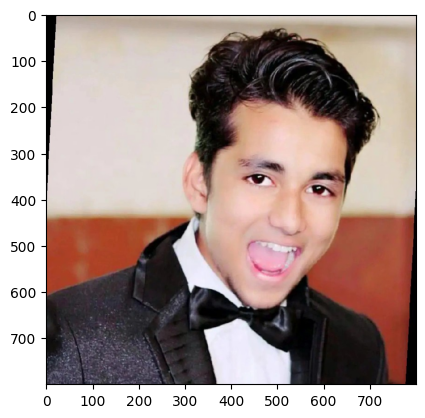

In [17]:

base_dir = os.path.join('data', 'faces')
filename3 = "faijan_face.jpg"
img_path3 = os.path.join(base_dir, filename3)
img3 = cv2.imread(img_path3)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))


In [18]:
metrics = ["cosine", "euclidean", "euclidean_l2"]

#face verification
result = DeepFace.verify(img_path1,img_path3
)

result

{'verified': False,
 'distance': 0.9524506096854963,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 117,
   'y': 26,
   'w': 56,
   'h': 56,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 343,
   'y': 218,
   'w': 362,
   'h': 362,
   'left_eye': (590, 380),
   'right_eye': (457, 355)}},
 'time': 0.36}